# Question1: Handwriting Recognition using Machine Learning!

Write and submit your python codes in “Jupyter Notebook” to perform the following tasks. Make sure to provide proper descriptions as MarkDown for each section of your code.

A) Download the dataset “Digit” and its label from this link:  https://app.box.com/s/sogk96kukv6ayyyy6ym63a2nu3aozif7

In [78]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

##url = 'https://app.box.com/s/sogk96kukv6ayyyy6ym63a2nu3aozif7/folder/126718588950'
hd_recg = pd.read_csv('label.csv', error_bad_lines=False)


In [79]:
hd_recg[0::500]

,name of the file,digit label
0,0,0
500,500,8
1000,1000,1
1500,1500,1


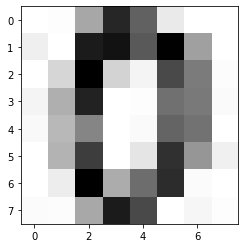

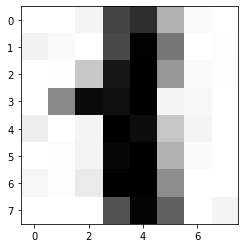

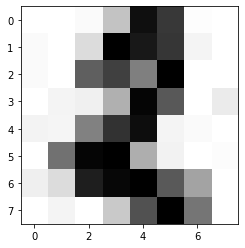

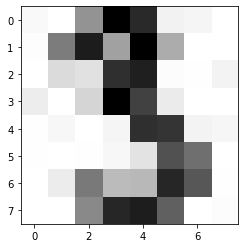

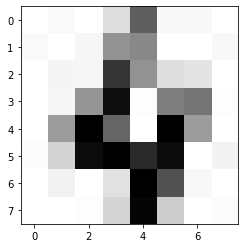

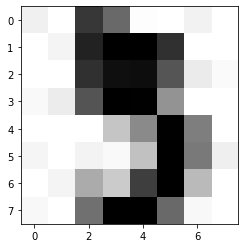

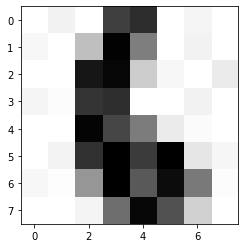

In [95]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

images = []
for i in range(0,7):
        images.append(mpimg.imread("C:/Users/sseeniv/Documents/DS assignment/Digit/Digit/"+ str(i) + ".jpg"))
        plt.imshow(images[i],cmap=plt.cm.gray_r,interpolation='nearest')
        plt.show()

B) Build the feature matrix and label vector: Each image is considered as a data sample with pixels as features. Thus, to build the feature table you have to convert each 8x8 image into an array of 64 elements (i.e. 64 pixels), and put it as a row of the feature matrix with 64 feature columns.

In [94]:
import numpy as np 
import pandas as pd 

size = 1797
feature = np.ones((size, 64))

for i in range(size):
    image_array = mpimg.imread("C:/Users/sseeniv/Documents/DS assignment/Digit/Digit/"+ str(i)+ ".jpg")
    image_matx= image_array.flatten()
    feature[i]=np.copy(image_matx)

Feature Matrix and Target Vector

In [84]:
X = feature.astype(int)  
Y = hd_recg['digit label']

In [85]:
X[0::10]

array([[  0,   2,  88, ...,   0,   9,   2],
       [  0,  11,   8, ...,  40,  14,   0],
       [  9,   0,  57, ...,  57,   0,   9],
       ...,
       [  0,  36, 159, ..., 142,   0,   9],
       [  0,  64, 215, ..., 170,  33,   0],
       [  0,  12,  74, ...,  57,   0,   1]])

In [89]:
Y[0::10]

0       0
10      0
20      0
30      0
40      8
       ..
1750    3
1760    1
1770    3
1780    2
1790    8
Name: digit label, Length: 180, dtype: int64

In [87]:
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)



C) Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.1, random_state=2.

 

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1, random_state=2) 

In [59]:
print(X_train.shape)
print(y_train.shape)

(1617, 64)
(1617,)


In [90]:
print(X_test.shape)
print(y_test.shape)


(180, 64)
(180,)


D) Use scikit-learn “Random Forest” classifier to recognize the hand-written digits based on the training/testing datasets that you built in part (c). Use this command to import and define your classifier:

from   sklearn.ensemble    import    RandomForestClassifier

my_RandomForest =

RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

Use my_RandomForest.fit for training your random forest classifier and my_RandomForest.predict  for prediction. Test your Machine Learning Algorithm on testing set (from part(c)), and calculate and report the accuracy.

 

In [91]:
from  sklearn.ensemble import RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train, y_train)
y_predict_RandFt=my_RandomForest.predict(X_test)
accuracy_RandFt=accuracy_score(y_test, y_predict_RandFt)
print("Random Forest:",accuracy_RandFt)


Random Forest: 0.9277777777777778


 

E) Write some codes to find which one of the data samples (i.e. which images) have been misclassified (classified incorrectly) in your testing set. Then, use the following command to show the misclassified images:    plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest')  

 

In [92]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import numpy as np

clf = RandomForestClassifier()
Result = []

clf.fit(X_train, y_train)
result = clf.predict(X_test)
cm = confusion_matrix(y_test, result)

y_test_Result = np.asarray(y_test)
misclassified = np.where(y_test_Result != clf.predict(X_test))
print("Misclassified values")
print(misclassified)
print("\n")

for i in range(int(y_test_Result.shape[0])):
    if y_predict_RandFt[i] != y_test_Result[i]:
        print("For",str(y_test.index.values[i]) + ".jpg", ":- ", "Predicted number - ",y_predict_RandFt[i], " |" ,"Number on the image- ", y_test_Result[i])
        Result.append(y_test_Result[i])
        

Misclassified values
(array([  4,  16,  41,  44,  45,  49,  63, 115, 130, 137, 165, 174, 179],
      dtype=int64),)


For 1660.jpg :-  Predicted number -  8  | Number on the image-  4
For 1611.jpg :-  Predicted number -  7  | Number on the image-  4
For 123.jpg :-  Predicted number -  1  | Number on the image-  8
For 1582.jpg :-  Predicted number -  5  | Number on the image-  9
For 492.jpg :-  Predicted number -  4  | Number on the image-  6
For 1603.jpg :-  Predicted number -  7  | Number on the image-  3
For 1628.jpg :-  Predicted number -  7  | Number on the image-  4
For 1605.jpg :-  Predicted number -  2  | Number on the image-  3
For 794.jpg :-  Predicted number -  1  | Number on the image-  8
For 37.jpg :-  Predicted number -  5  | Number on the image-  9
For 69.jpg :-  Predicted number -  7  | Number on the image-  9
For 1468.jpg :-  Predicted number -  5  | Number on the image-  8
For 1573.jpg :-  Predicted number -  4  | Number on the image-  0


1660 .jpg


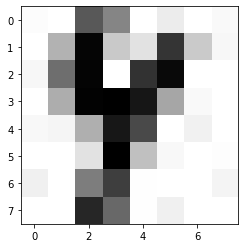

1611 .jpg


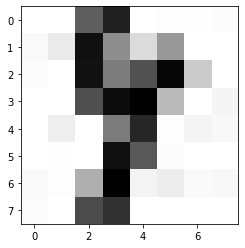

123 .jpg


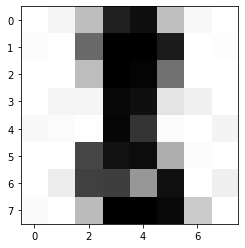

1582 .jpg


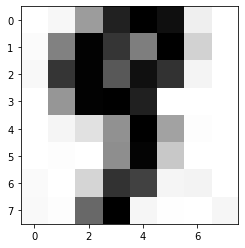

492 .jpg


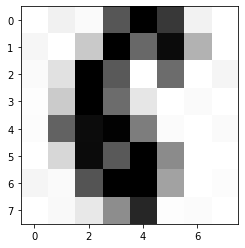

1603 .jpg


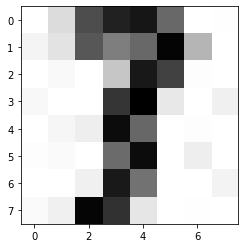

1628 .jpg


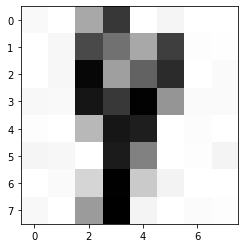

794 .jpg


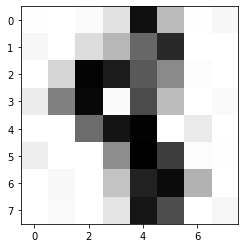

37 .jpg


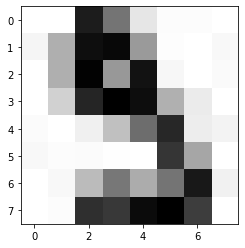

69 .jpg


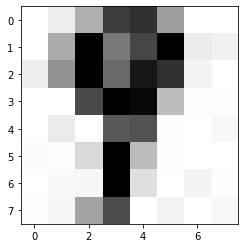

1468 .jpg


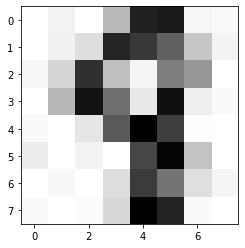

1573 .jpg


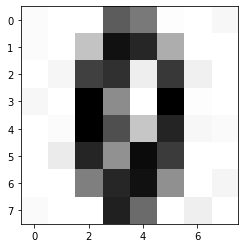

1095 .jpg


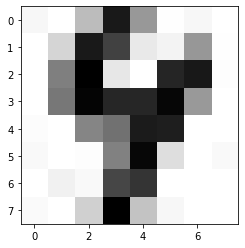

In [96]:
for m in misclassified[0]:
    
    Img=mpimg.imread("C:/Users/sseeniv/Documents/DS assignment/Digit/Digit/"+str(y_test.index.values[m])+ ".jpg")
    snap=str(y_test.index.values[m])
    print(snap,'.jpg')
    plt.imshow(Img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()